In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:

# Set up the data directories
train_dir = '/content/drive/MyDrive/images/train'
test_dir = '/content/drive/MyDrive/images/validation'



In [3]:
# Define some parameters
batch_size = 64
img_height = 48
img_width = 48
num_epochs = 10



In [4]:
# Create the image generators for the training and testing data
train_data_gen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)
                                    
test_data_gen = ImageDataGenerator(rescale=1./255)

train_data = train_data_gen.flow_from_directory(train_dir,
                                                 target_size=(img_height, img_width),
                                                 color_mode='grayscale',
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 shuffle=True)

test_data = test_data_gen.flow_from_directory(test_dir,
                                               target_size=(img_height, img_width),
                                               color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False)



Found 29013 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [5]:
# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), padding='same', activation='relu', input_shape=(img_height, img_width, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])



In [7]:
# Compile the model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_data,
                    epochs=num_epochs,
                    validation_data=test_data)



Epoch 1/10
454/454 [==============================] - 123s 267ms/step - loss: 1.7866 - accuracy: 0.2564 - val_loss: 1.7286 - val_accuracy: 0.3047
Epoch 2/10
454/454 [==============================] - 124s 273ms/step - loss: 1.7504 - accuracy: 0.2778 - val_loss: 1.6943 - val_accuracy: 0.3238
Epoch 3/10
454/454 [==============================] - 123s 271ms/step - loss: 1.7231 - accuracy: 0.2952 - val_loss: 1.6410 - val_accuracy: 0.3596
Epoch 4/10
454/454 [==============================] - 122s 269ms/step - loss: 1.6911 - accuracy: 0.3188 - val_loss: 1.5772 - val_accuracy: 0.3932
Epoch 5/10
454/454 [==============================] - 122s 268ms/step - loss: 1.6509 - accuracy: 0.3415 - val_loss: 1.5222 - val_accuracy: 0.4151
Epoch 6/10
454/454 [==============================] - 121s 267ms/step - loss: 1.6130 - accuracy: 0.3643 - val_loss: 1.4823 - val_accuracy: 0.4353
Epoch 7/10
454/454 [==============================] - 114s 250ms/step - loss: 1.5768 - accuracy: 0.3822 - val_loss: 1.4994 -

111/111 [==============================] - 15s 133ms/step - loss: 1.3498 - accuracy: 0.4898


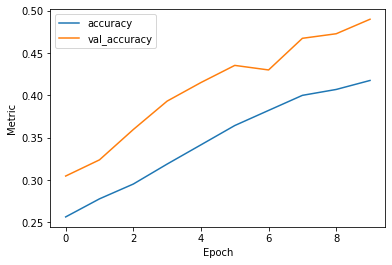

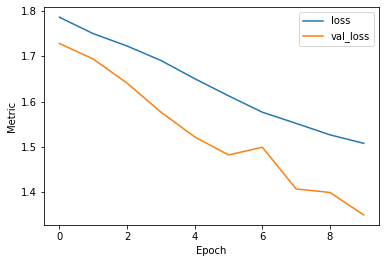

In [8]:
# Evaluate the model on the test data
model.evaluate(test_data)

# Plot the accuracy and loss curves
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend()
plt.show()

In [9]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), padding='same', activation='sigmoid', input_shape=(img_height, img_width, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='sigmoid'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='sigmoid'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

# Compile the model
from tensorflow.keras.optimizers import Adam
model2.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history2 = model2.fit(train_data,
                    epochs=num_epochs,
                    validation_data=test_data)



Epoch 1/10
454/454 [==============================] - 119s 254ms/step - loss: 1.8223 - accuracy: 0.2398 - val_loss: 1.8250 - val_accuracy: 0.1721
Epoch 2/10
454/454 [==============================] - 122s 268ms/step - loss: 1.8138 - accuracy: 0.2482 - val_loss: 1.8079 - val_accuracy: 0.2583
Epoch 3/10
454/454 [==============================] - 121s 266ms/step - loss: 1.8100 - accuracy: 0.2492 - val_loss: 1.7983 - val_accuracy: 0.2586
Epoch 4/10
454/454 [==============================] - 135s 297ms/step - loss: 1.7984 - accuracy: 0.2535 - val_loss: 1.7818 - val_accuracy: 0.2675
Epoch 5/10
454/454 [==============================] - 120s 265ms/step - loss: 1.7904 - accuracy: 0.2536 - val_loss: 1.7741 - val_accuracy: 0.2675
Epoch 6/10
454/454 [==============================] - 122s 269ms/step - loss: 1.7857 - accuracy: 0.2575 - val_loss: 1.7732 - val_accuracy: 0.2705
Epoch 7/10
454/454 [==============================] - 112s 246ms/step - loss: 1.7829 - accuracy: 0.2589 - val_loss: 1.7650 -

111/111 [==============================] - 15s 132ms/step - loss: 1.7445 - accuracy: 0.2908


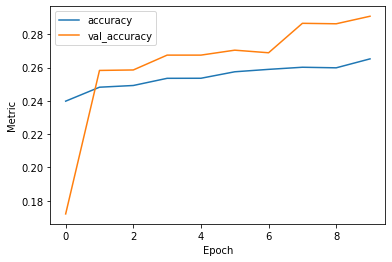

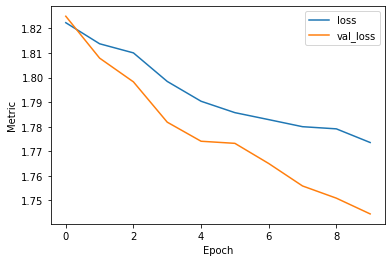

In [13]:
model2.evaluate(test_data)

# Plot the accuracy and loss curves
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend()
plt.show()

plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend()
plt.show()

In [14]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), padding='same', activation='tanh', input_shape=(img_height, img_width, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

# Compile the model
from tensorflow.keras.optimizers import Adam
model3.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history3 = model3.fit(train_data,
                    epochs=num_epochs,
                    validation_data=test_data)


Epoch 1/10
454/454 [==============================] - 114s 248ms/step - loss: 1.7930 - accuracy: 0.2561 - val_loss: 1.7250 - val_accuracy: 0.3051
Epoch 2/10
454/454 [==============================] - 168s 371ms/step - loss: 1.7424 - accuracy: 0.2908 - val_loss: 1.6412 - val_accuracy: 0.3701
Epoch 3/10
454/454 [==============================] - 120s 263ms/step - loss: 1.6951 - accuracy: 0.3155 - val_loss: 1.5725 - val_accuracy: 0.3985
Epoch 4/10
454/454 [==============================] - 122s 268ms/step - loss: 1.6644 - accuracy: 0.3386 - val_loss: 1.5342 - val_accuracy: 0.4108
Epoch 5/10
454/454 [==============================] - 125s 276ms/step - loss: 1.6257 - accuracy: 0.3560 - val_loss: 1.4984 - val_accuracy: 0.4277
Epoch 6/10
454/454 [==============================] - 123s 270ms/step - loss: 1.5945 - accuracy: 0.3797 - val_loss: 1.4658 - val_accuracy: 0.4288
Epoch 7/10
454/454 [==============================] - 121s 267ms/step - loss: 1.5672 - accuracy: 0.3873 - val_loss: 1.4423 -

111/111 [==============================] - 15s 130ms/step - loss: 1.3707 - accuracy: 0.4741


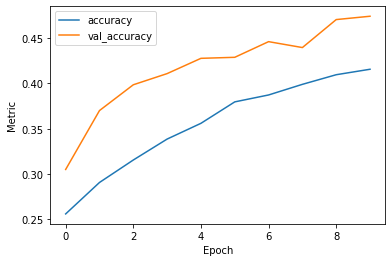

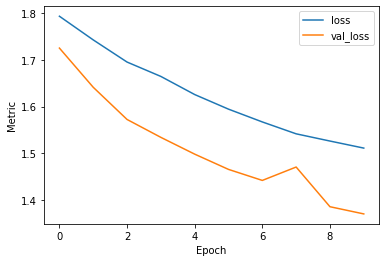

In [15]:
model3.evaluate(test_data)

# Plot the accuracy and loss curves
plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend()
plt.show()

plt.plot(history3.history['loss'], label='loss')
plt.plot(history3.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend()
plt.show()

In [17]:
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), padding='same', activation='softmax', input_shape=(img_height, img_width, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='softmax'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='softmax'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

# Compile the model
from tensorflow.keras.optimizers import Adam
model4.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history4 = model4.fit(train_data,
                    epochs=num_epochs,
                    validation_data=test_data)

Epoch 1/10
454/454 [==============================] - 136s 296ms/step - loss: 1.8177 - accuracy: 0.2484 - val_loss: 1.8098 - val_accuracy: 0.2583
Epoch 2/10
454/454 [==============================] - 119s 263ms/step - loss: 1.8122 - accuracy: 0.2474 - val_loss: 1.7813 - val_accuracy: 0.2583
Epoch 3/10
454/454 [==============================] - 120s 264ms/step - loss: 1.7838 - accuracy: 0.2518 - val_loss: 1.7594 - val_accuracy: 0.2815
Epoch 4/10
454/454 [==============================] - 127s 279ms/step - loss: 1.7769 - accuracy: 0.2610 - val_loss: 1.7510 - val_accuracy: 0.2804
Epoch 5/10
454/454 [==============================] - 126s 276ms/step - loss: 1.7761 - accuracy: 0.2600 - val_loss: 1.7462 - val_accuracy: 0.2900
Epoch 6/10
454/454 [==============================] - 119s 263ms/step - loss: 1.7745 - accuracy: 0.2603 - val_loss: 1.7433 - val_accuracy: 0.2897
Epoch 7/10
454/454 [==============================] - 120s 264ms/step - loss: 1.7719 - accuracy: 0.2653 - val_loss: 1.7452 -

111/111 [==============================] - 15s 138ms/step - loss: 1.7298 - accuracy: 0.3023


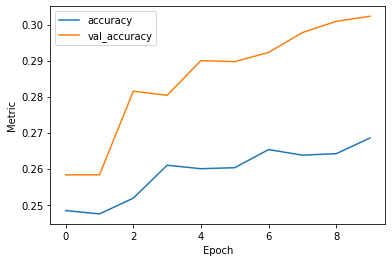

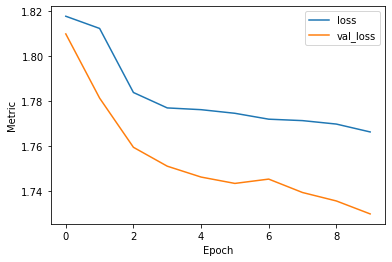

In [18]:
model4.evaluate(test_data)

# Plot the accuracy and loss curves
plt.plot(history4.history['accuracy'], label='accuracy')
plt.plot(history4.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend()
plt.show()

plt.plot(history4.history['loss'], label='loss')
plt.plot(history4.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend()
plt.show()

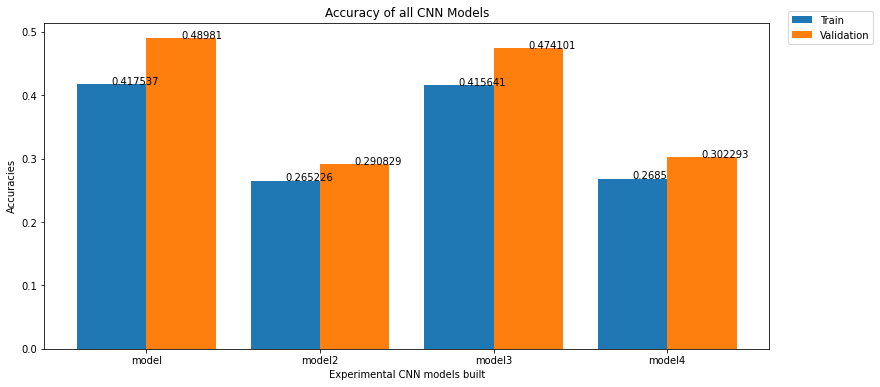

In [22]:
# https://colab.research.google.com/drive/13vqjnfJJzQ1adTBR2vJRh_4x7llyd1FK#scrollTo=uYbE-ECGyNX4
import pandas as pd
import matplotlib.pyplot as plt

def addlabels(x,y,z):
    for i in range(len(x)):
        plt.text(i + z,y[i],y[i])

validation_m1 = round(max(history.history['val_accuracy']), 6)
validation_m2 = round(max(history2.history['val_accuracy']), 6)
validation_m3 = round(max(history3.history['val_accuracy']), 6)
validation_m4 = round(max(history4.history['val_accuracy']), 6)

train_m1 = round(max(history.history['accuracy']), 6)
train_m2 = round(max(history2.history['accuracy']), 6)
train_m3 = round(max(history3.history['accuracy']), 6)
train_m4 = round(max(history4.history['accuracy']), 6)

val_data = {'Model_1':validation_m1, 'Model_2':validation_m2,'Model_3':validation_m3,'Model_4':validation_m4}
train_data = {'Model_1':train_m1, 'Model_2':train_m2,'Model_3':train_m3,'Model_4':train_m4}

models = ['model','model2','model3','model4']
val_accuracies = list(val_data.values())
train_accuracies = list(train_data.values())
X_axis = np.arange(len(models))
fig = plt.figure(figsize = (13, 6))
 
# creating the bar plot
plt.bar(X_axis - 0.2, train_accuracies, width = 0.4, label="Train")
plt.bar(X_axis + 0.2, val_accuracies, width = 0.4, label="Validation")
addlabels(models, train_accuracies, -0.2)
addlabels(models, val_accuracies, +0.2)
plt.xticks(X_axis, models)
plt.xlabel("Experimental CNN models built")
plt.ylabel("Accuracies")
plt.title("Accuracy of all CNN Models")
plt.legend(bbox_to_anchor=(1.15, 1.05))
plt.show()


In [ ]:

# https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/